In [1]:
# main libraries
import pandas as pd
import numpy as np
import time
import warnings
warnings.filterwarnings('ignore')

# visual libraries
import joblib
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')

# sklearn libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report,roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/creditcard_2023.csv'  # Ensure file is uploaded
df = pd.read_csv(file_path)

# Preview the Data
print(df.head())
print(df.info())

   id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   

        V26       V27       V28    Amount  C

In [4]:
df.shape

(568630, 31)

In [5]:
df.isnull().sum()

,0
id,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [6]:
All = df.shape[0]
fraud = df[df['Class'] == 1]
nonFraud = df[df['Class'] == 0]

x = len(fraud)/All
y = len(nonFraud)/All

print('frauds :',x*100,'%')
print('non frauds :',y*100,'%')

frauds : 50.0 %
non frauds : 50.0 %


Text(0, 0.5, 'Frequency')

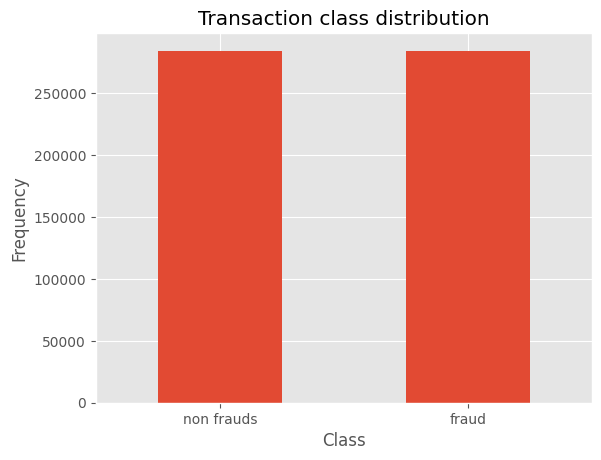

In [7]:
# Let's plot the Transaction class against the Frequency
labels = ['non frauds','fraud']
classes = pd.value_counts(df['Class'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

<Axes: ylabel='Density'>

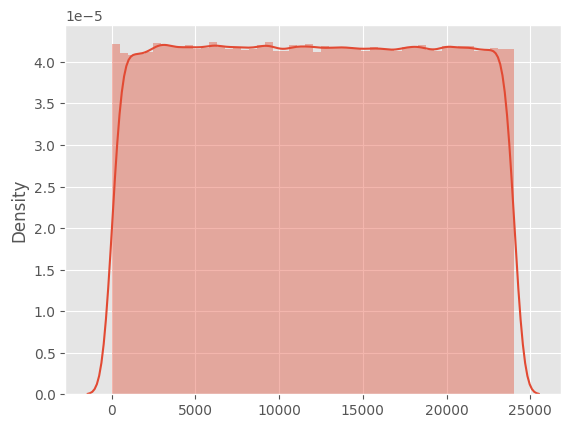

In [8]:
# distribution of Amount
amount = [df['Amount'].values]
sns.distplot(amount)

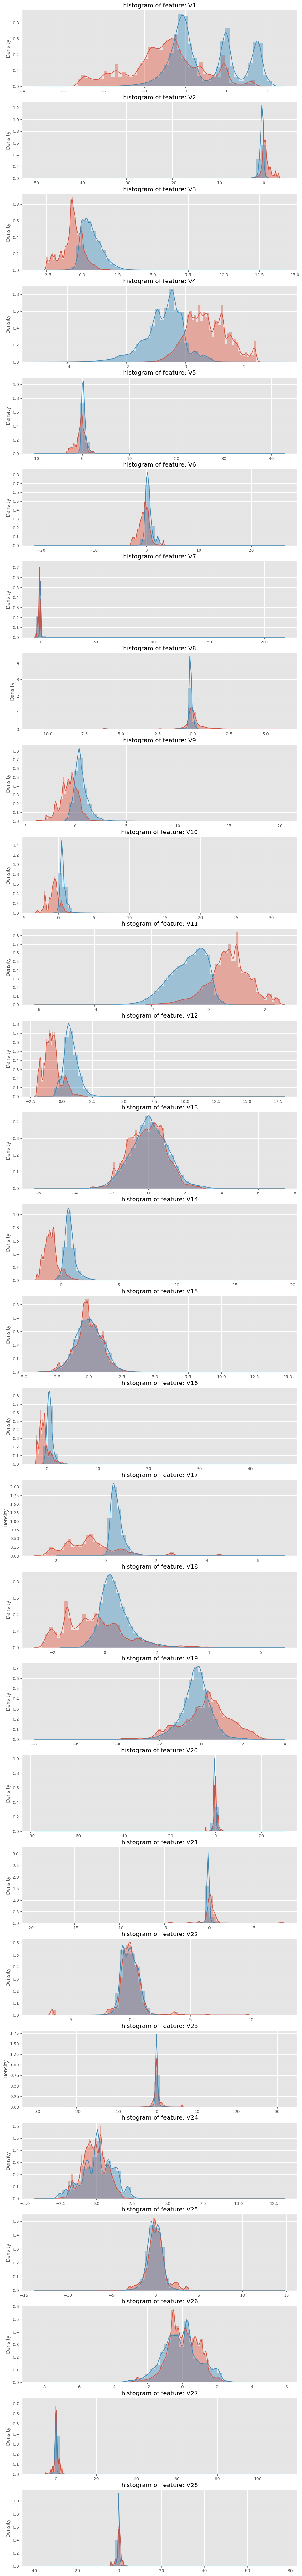

In [9]:
# distribution of anomalous features
anomalous_features = df.iloc[:,1:29].columns

plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(df[anomalous_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.Class == 1], bins=50)
    sns.distplot(df[cn][df.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

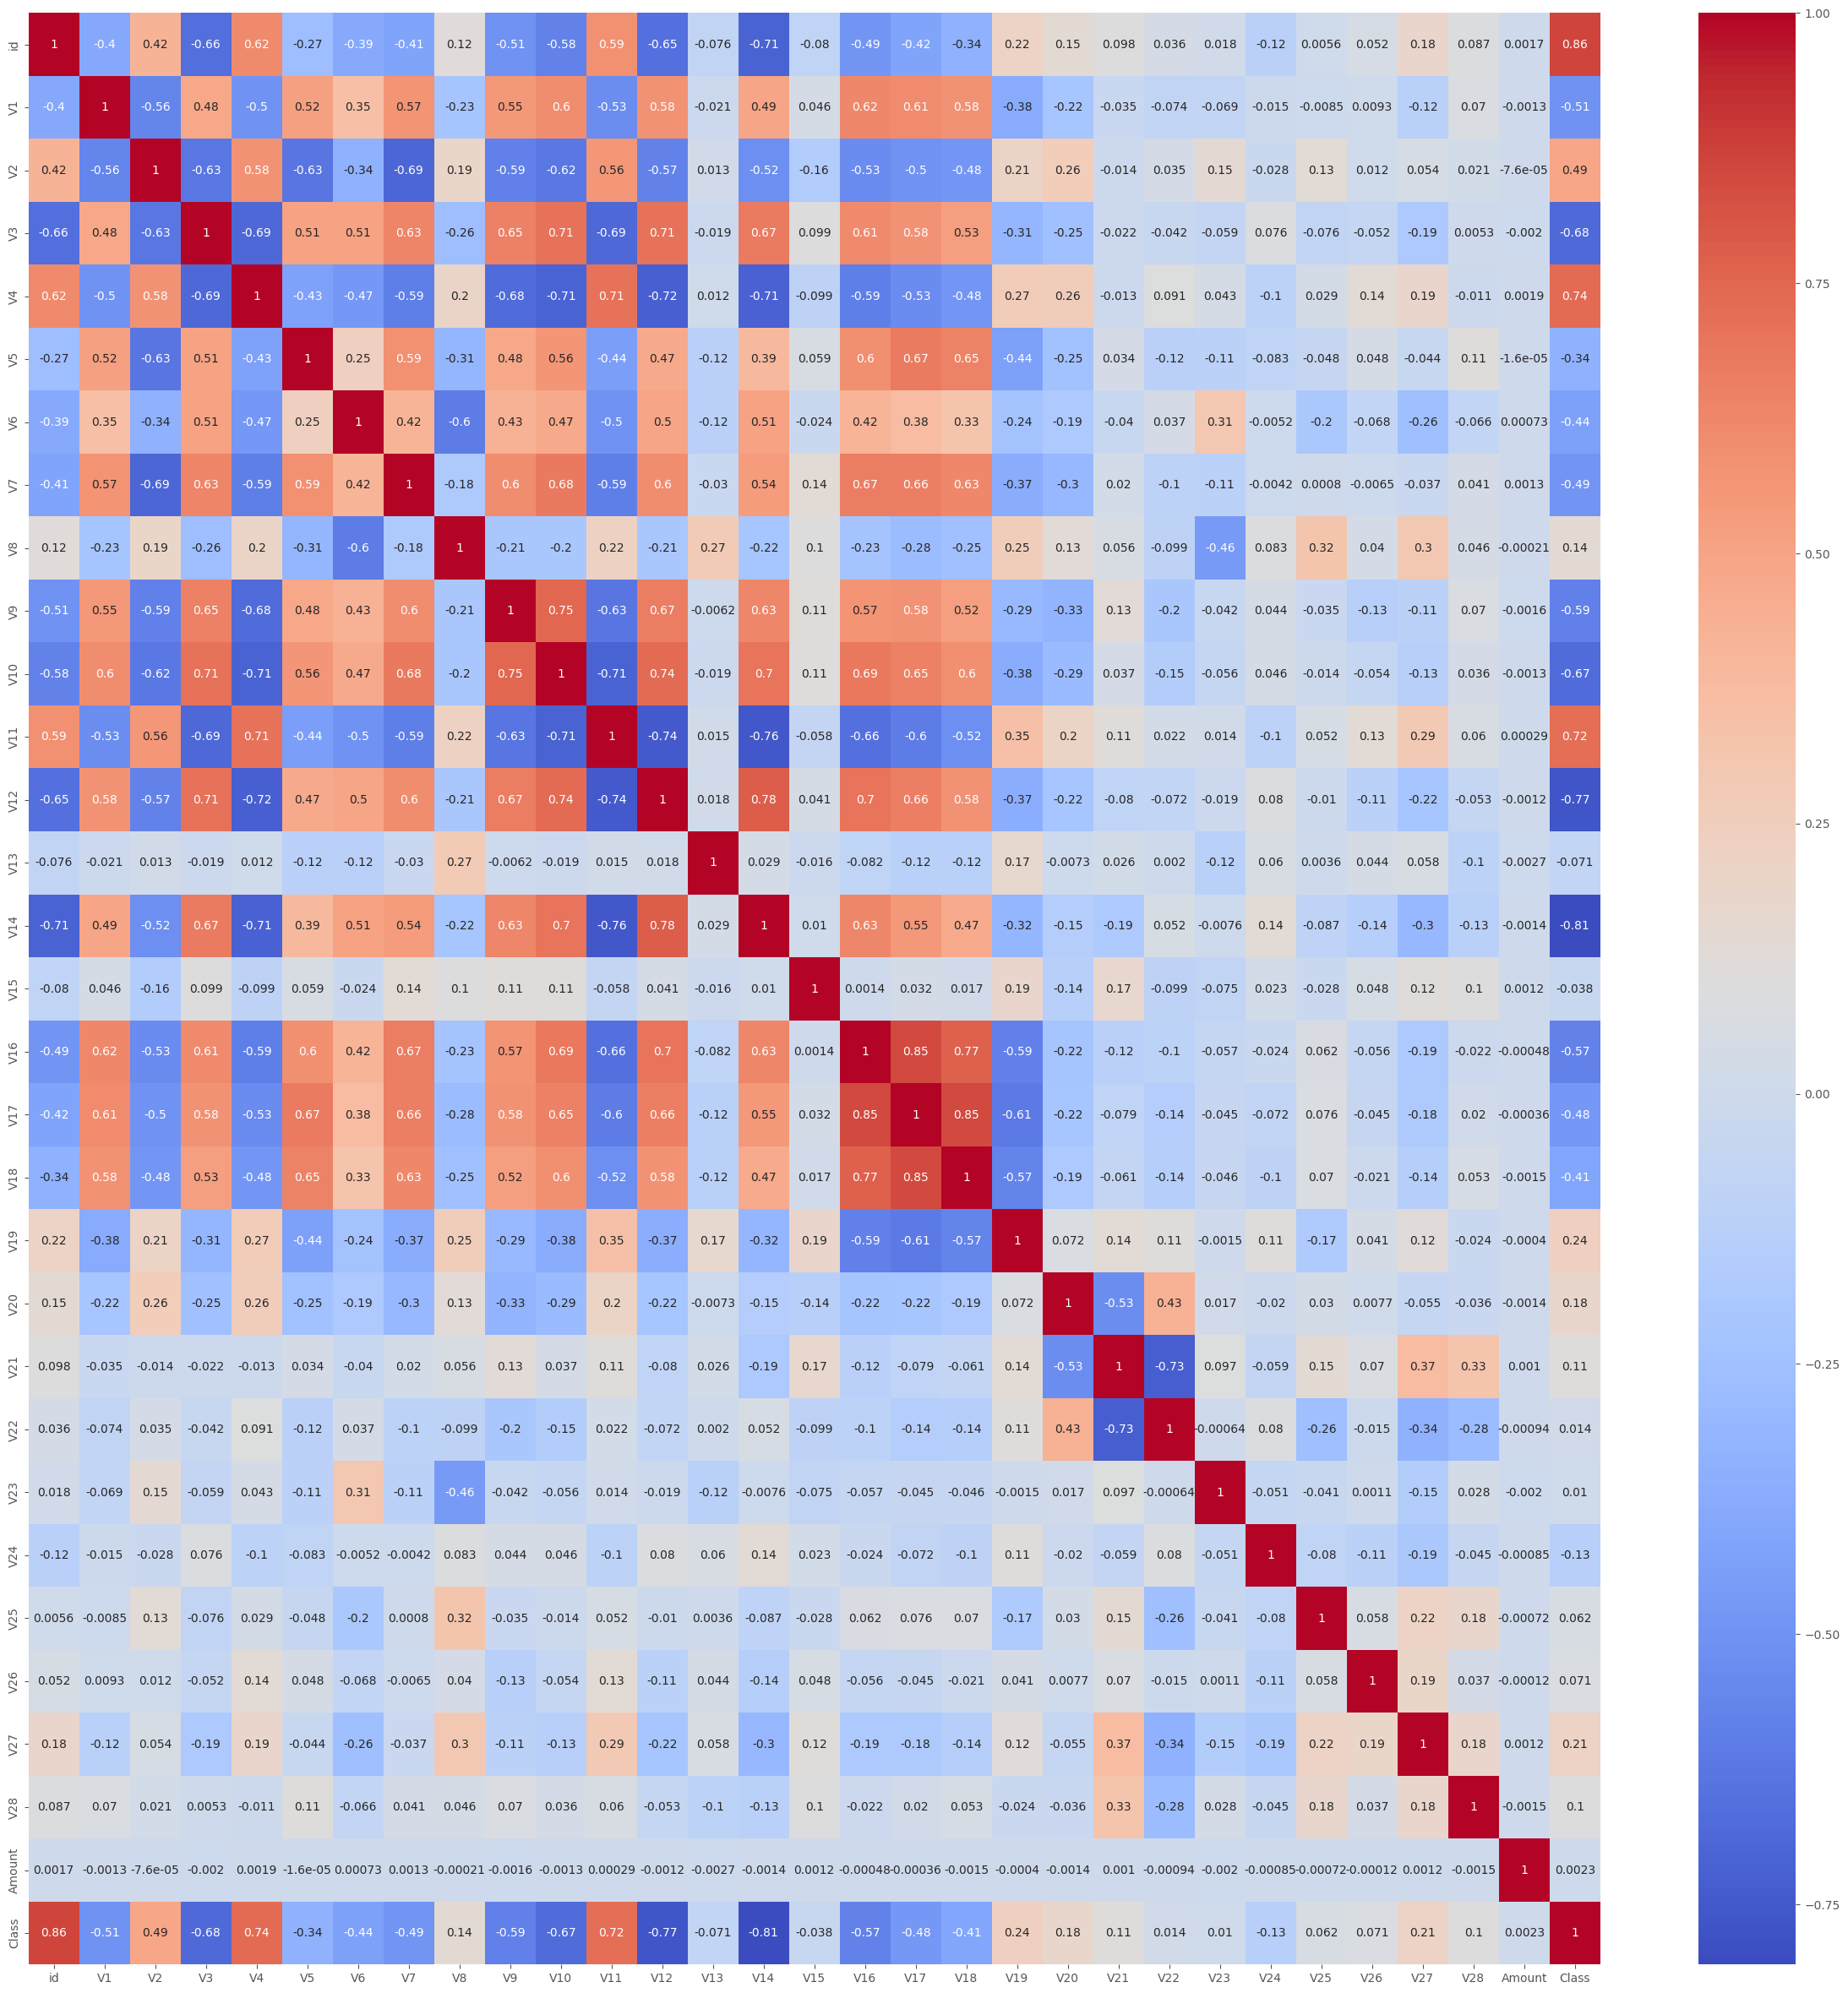

In [12]:
correlation_matrix = df.corr()
fig = plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, cmap = 'coolwarm', annot = True)
plt.show()

In [13]:
# Standardizing the 'Amount' column and creating a new column 'Vamount'
df['Vamount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))

# Dropping the original 'Amount' column
df = df.drop(['Amount'], axis=1)

# Display the first few rows to confirm changes
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Vamount
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,0,0.858447
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,0,-0.796369
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,0,-1.377011
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,0,-0.962119
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,0,0.323285


In [14]:
# Define features (X) and labels (y)
X = df.drop(['Class'], axis=1)
y = df['Class']

In [15]:
# Apply PCA for 2D visualization of dataset
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
final_df = pd.concat([principal_df, y.reset_index(drop=True)], axis=1)
final_df.head()

,Principal Component 1,Principal Component 2,Class
0,-284314.500007,-1.204458,0
1,-284313.500005,-1.179770,0
2,-284312.500007,-1.029693,0
3,-284311.500010,-0.484464,0
4,-284310.500007,-1.449352,0


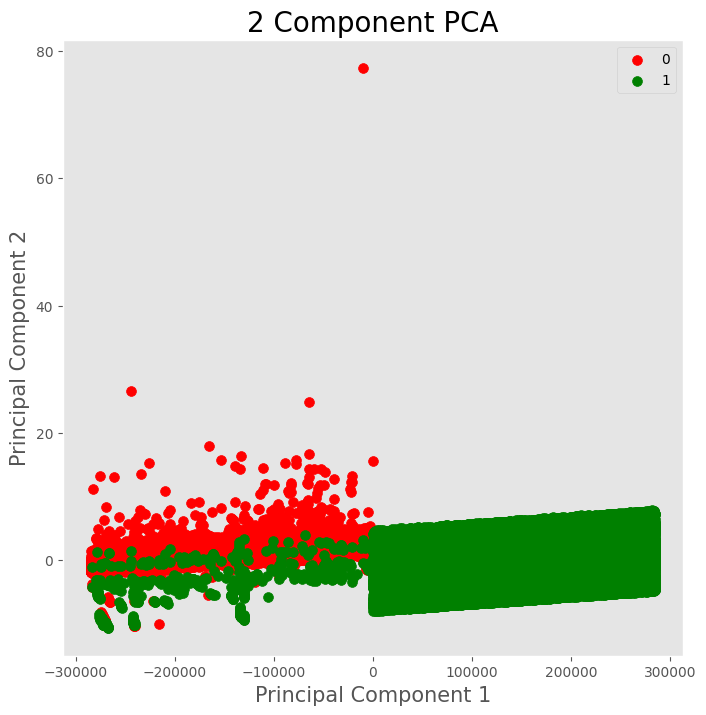

In [16]:
# Plot 2D PCA result
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 Component PCA', fontsize=20)

targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets, colors):
    indices_to_keep = final_df['Class'] == target
    ax.scatter(final_df.loc[indices_to_keep, 'Principal Component 1'],
               final_df.loc[indices_to_keep, 'Principal Component 2'],
               c=color, s=50)
ax.legend(targets)
ax.grid()
plt.show()

In [17]:
# Balance dataset with equal number of fraud and non-fraud samples
frauds = df[df['Class'] == 1]
non_frauds = df[df['Class'] == 0][:len(frauds)]

balanced_df = pd.concat([non_frauds, frauds]).sample(frac=1, random_state=42)
balanced_df['Class'].value_counts()

,count
Class,
1,284315
0,284315


In [18]:
# Sample 5% of the data to reduce processing time
sampled_df = df.sample(frac=0.10, random_state=42)
sampled_df.shape  # Confirm the size is 5% of original data

(56863, 31)

In [19]:
# Prepare features and labels using sampled data
X = sampled_df.drop(['Class'], axis=1)
y = sampled_df['Class']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
X_train = normalize(X_train)
X_test = normalize(X_test)

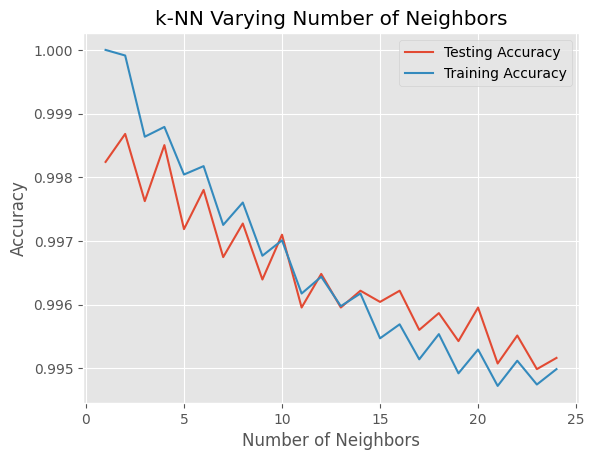

In [20]:
# Evaluate k values for k-NN using the smaller sample
neighbors = np.arange(1, 25)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k, algorithm="kd_tree", n_jobs=-1)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

# Plot accuracy by k value
plt.title('k-NN Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [21]:
# Find the optimal k value with the highest test accuracy
optimal_k = neighbors[np.argmax(test_accuracy)]
print(f"Optimal k value: {optimal_k}")

# Train final k-NN model with optimal k
final_knn = KNeighborsClassifier(n_neighbors=optimal_k, algorithm="kd_tree", n_jobs=-1)
final_knn.fit(X_train, y_train)

Optimal k value: 2


KNeighborsClassifier(algorithm='kd_tree', n_jobs=-1, n_neighbors=2)

In [22]:
# Save the model to disk
import joblib
filename = 'final_knn_model.sav'
joblib.dump(final_knn, filename)
print("Model saved as 'final_knn_model.sav'")

Model saved as 'final_knn_model.sav'


In [23]:
# Predict on test set
y_pred = final_knn.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Display metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

Accuracy: 0.9987
Precision: 0.9974
Recall: 1.0000
F1 Score: 0.9987
Matthews Correlation Coefficient (MCC): 0.9974



Classification Report:
               precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00      5678
       Fraud       1.00      1.00      1.00      5695

    accuracy                           1.00     11373
   macro avg       1.00      1.00      1.00     11373
weighted avg       1.00      1.00      1.00     11373



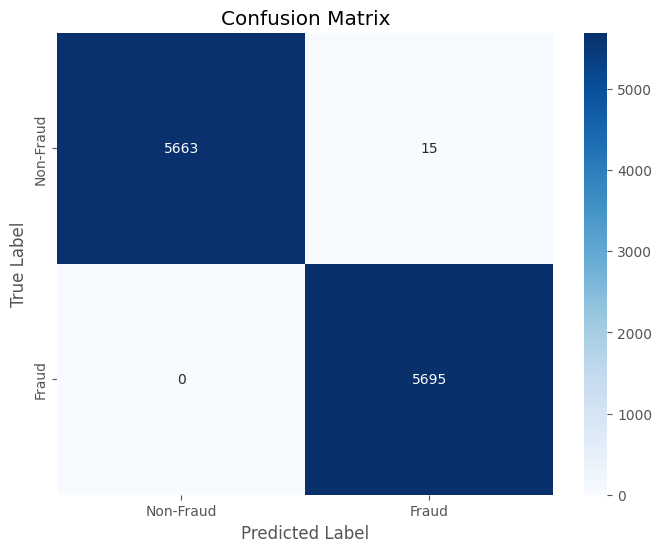

In [24]:
# Display detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Non-Fraud', 'Fraud']))

# Confusion matrix plot
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

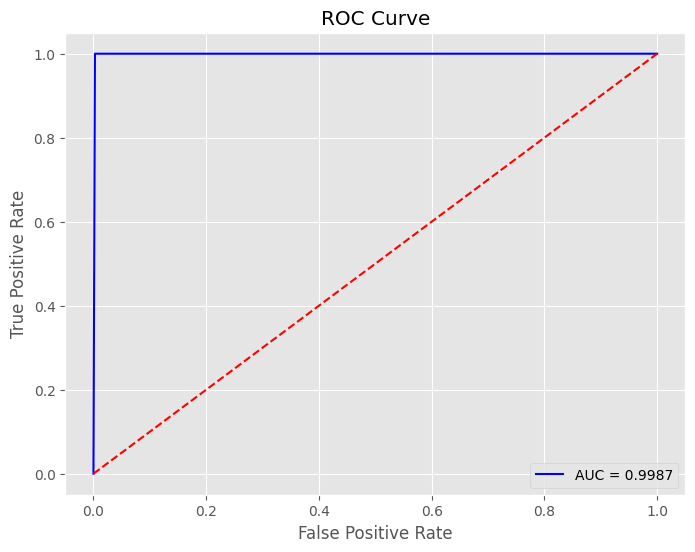

In [25]:
# ROC Curve and AUC
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba = final_knn.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_score:.4f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()